In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# from statsmodels.stats.power import TTestIndPower
import seaborn as sns

df = pd.read_csv('spotify_songs.csv')
plt.rcParams["figure.dpi"] = 140

Загрузка, начальный EDA и очистка данных

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [314]:
df.shape

(32833, 23)

In [315]:
df.duplicated()
# dubl = df.duplicated()
# count = 0
# for c in dubl:
#     if c == True:
#         count +=1
# print(count)

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Length: 32833, dtype: bool

In [316]:
# df.isna().sum()

In [317]:
pd.set_option('display.max_columns', None)
df.head(10)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040


In [318]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors = 'coerce')

In [319]:
df['duration_ms']

0        194754
1        162600
2        176616
3        169093
4        189052
          ...  
32828    204375
32829    353120
32830    210112
32831    367432
32832    337500
Name: duration_ms, Length: 32833, dtype: int64

In [320]:
df['release_year'] = df['track_album_release_date'].dt.year
df['release_month'] = df['track_album_release_date'].dt.month
df = df[df['duration_ms'] > 0]

In [321]:
df['duration_min'] = df['duration_ms'] / 60000.0
df['duration_min']

0        3.245900
1        2.710000
2        2.943600
3        2.818217
4        3.150867
           ...   
32828    3.406250
32829    5.885333
32830    3.501867
32831    6.123867
32832    5.625000
Name: duration_min, Length: 32833, dtype: float64

In [322]:
df = df[df["tempo"] > 0]
df = df[df["mode"].isin([0, 1])]
df["mode_label"] = df["mode"].map({0: "minor", 1: "major"})
df = df.dropna(subset=["track_popularity"])
df = df[(df["track_popularity"] >= 0) & (df["track_popularity"] <= 100)]

Более глубокий анализ и визуализация (на этом этапе уже стараемся формулировать гипотезы для будущей проверки)

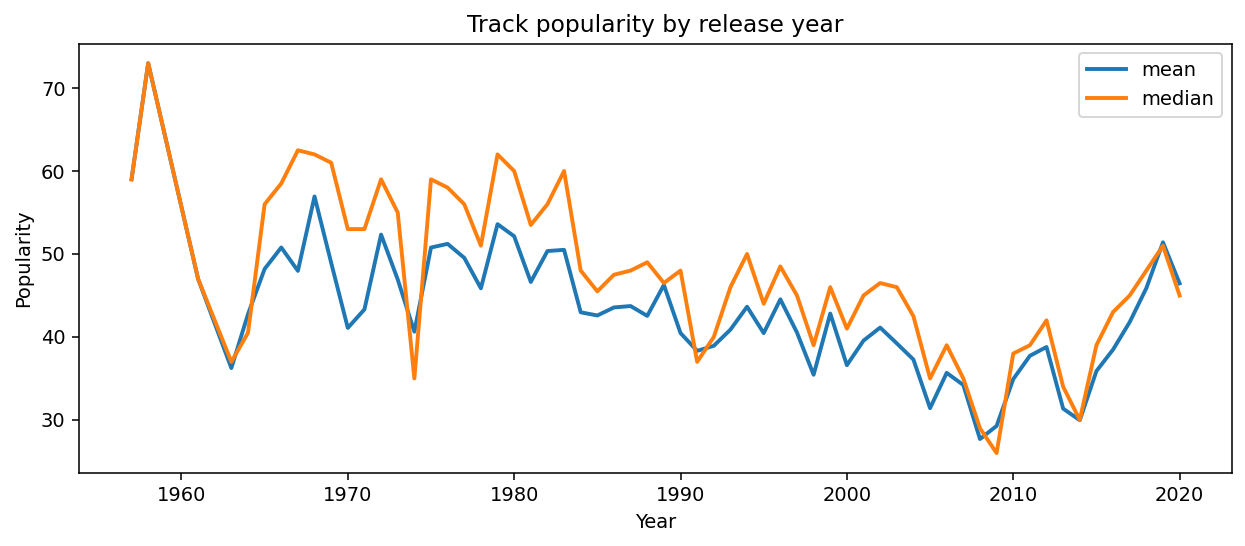

In [323]:
ag = (df.dropna(subset=["release_year"])
            .groupby("release_year")["track_popularity"]
            .agg(["mean","median","count"])
            .reset_index()
            .sort_values("release_year"))
    
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(ag["release_year"], ag["mean"],   label="mean",   lw=2)
ax.plot(ag["release_year"], ag["median"], label="median", lw=2)
ax.set_title("Track popularity by release year")
ax.set_xlabel("Year"); ax.set_ylabel("Popularity")
ax.legend(); plt.tight_layout()
plt.show()



Посмотрим на число хитов и на общее число хитов в каждом году

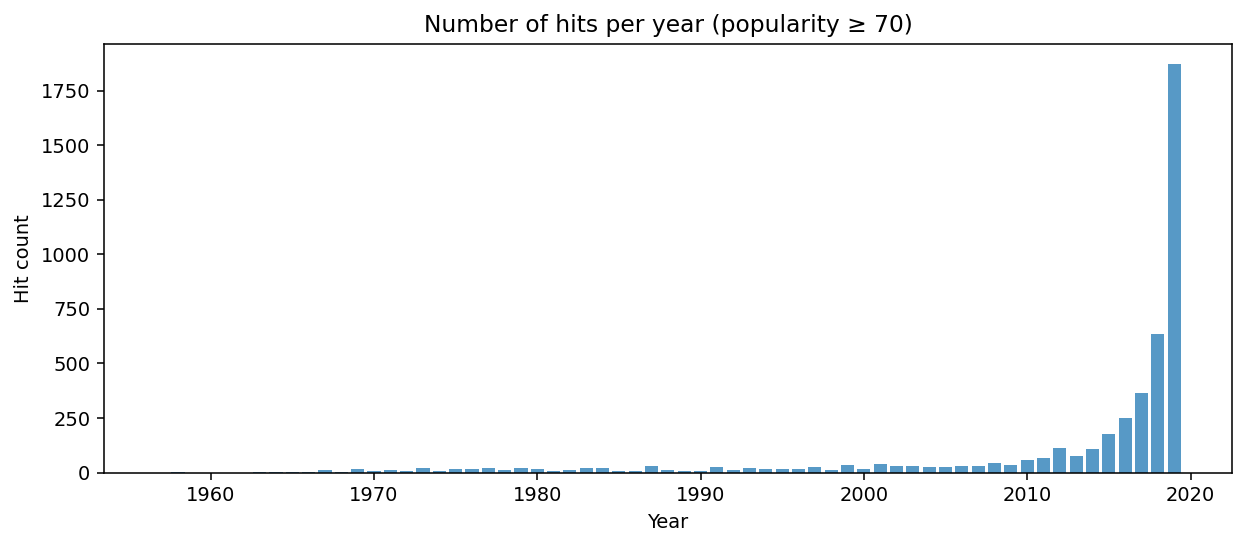

In [324]:
thr = 70
hit = (df[df["release_year"]<=2019]).copy()
hit_cnt = (hit.assign(is_hit=lambda x: x["track_popularity"] >= thr)
              .groupby("release_year")["is_hit"].sum()
              .rename("hit_count")
              .reset_index())

plt.figure(figsize=(9,4))
plt.bar(hit_cnt["release_year"], hit_cnt["hit_count"], width=0.8, alpha=0.75)
plt.title(f"Number of hits per year (popularity ≥ {thr})")
plt.xlabel("Year"); plt.ylabel("Hit count")
plt.tight_layout(); plt.show()

In [325]:
oldies = df[df["release_year"] < 1962] 
oldies.head(len(oldies))

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month,duration_min,mode_label
13461,4gphxUgq0JSFv2BCLhNDiE,Jailhouse Rock,Elvis Presley,73,0C3t1htEDTFKcg7F2rNbek,Elvis' Golden Records,1958-03-21,Blues Rock,56dbowk1V5ycS5jW7DSvi5,rock,classic rock,0.647,0.582,10,-9.538,0,0.0755,0.410,0.000002,0.0715,0.915,167.396,146480,1958.0,3.0,2.441333,minor
22107,02K5IV55wIgNNARk3UA95E,Paloma Negra,Chavela Vargas,47,2Z3BXtXY75OOYcJljBozCb,Chavela Vargas,1961-10-26,Urban contemporary,1ZlL3IQS8eB0s0RMxz02yD,r&b,urban contemporary,0.585,0.036,2,-14.145,1,0.0418,0.859,0.000003,0.0908,0.433,151.223,198760,1961.0,10.0,3.312667,major
22723,7DJsL4jyXA39GDiHFQYQ0t,Mess Around,Ray Charles,59,0cw6Sv7IwZ87aLPPvNPSd0,"Ray Charles (aka: Hallelujah, I Love Her So)",1957-01-01,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,1S7BckuYIkEazeNKOSM0uA,r&b,urban contemporary,0.565,0.962,8,-2.981,1,0.0640,0.437,0.000000,0.0560,0.906,148.808,160227,1957.0,1.0,2.670450,major


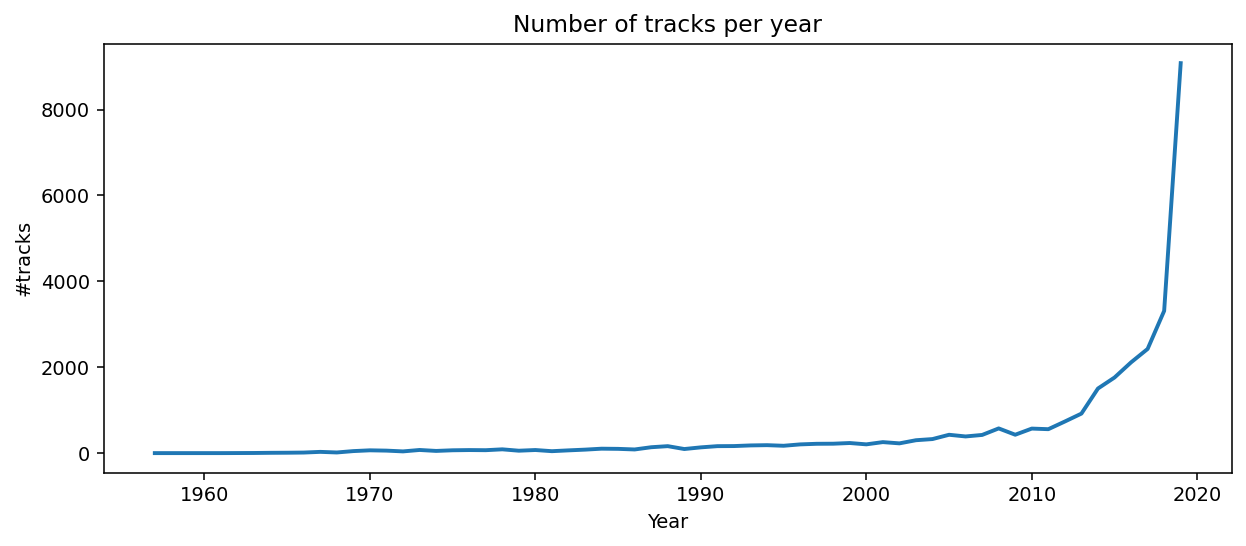

In [326]:
year_cnt = (df.dropna(subset=["release_year"])
                  .groupby("release_year")
                  .size()
                  .reset_index(name="n_tracks")
                  .sort_values("release_year"))

fig, ax = plt.subplots(figsize=(9,4))
mask = year_cnt["release_year"] != 2020
plt.plot(year_cnt.loc[mask, "release_year"], year_cnt.loc[mask, "n_tracks"], lw=2)
ax.set_title("Number of tracks per year")
ax.set_xlabel("Year"); ax.set_ylabel("#tracks")
plt.tight_layout(); plt.show()

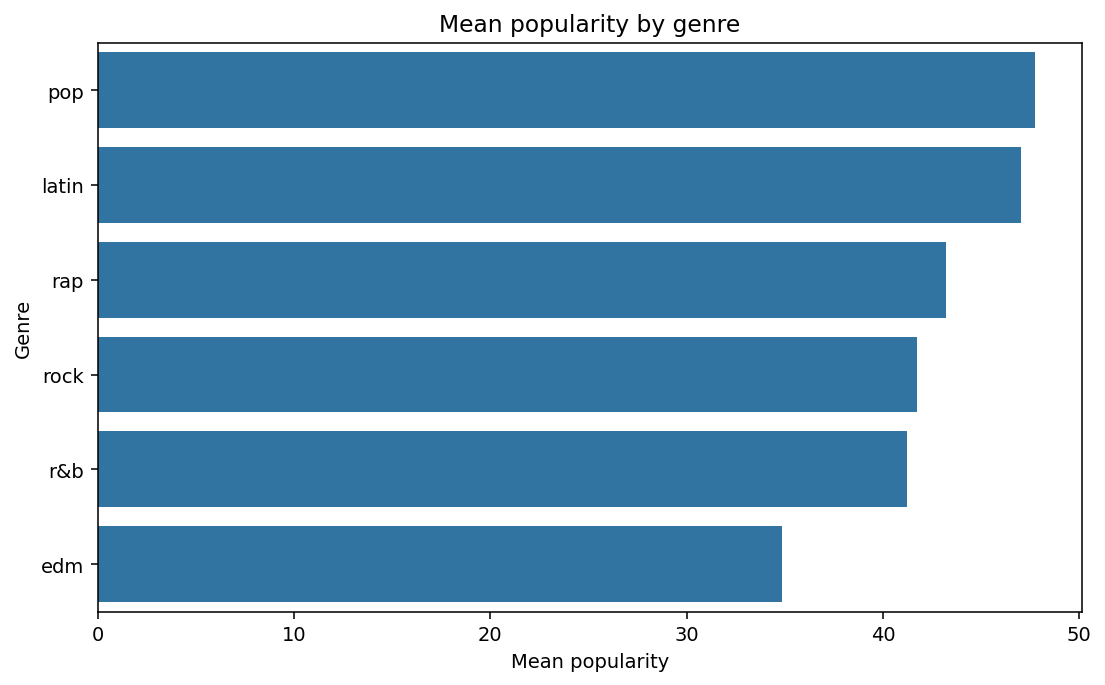

In [327]:
ag_g = (df.groupby("playlist_genre")["track_popularity"]
              .mean().sort_values(ascending=False))
plt.figure(figsize=(8,5))
sns.barplot(x=ag_g.values, y=ag_g.index, orient="h")
plt.title("Mean popularity by genre")
plt.xlabel("Mean popularity"); plt.ylabel("Genre")
plt.tight_layout(); plt.show()

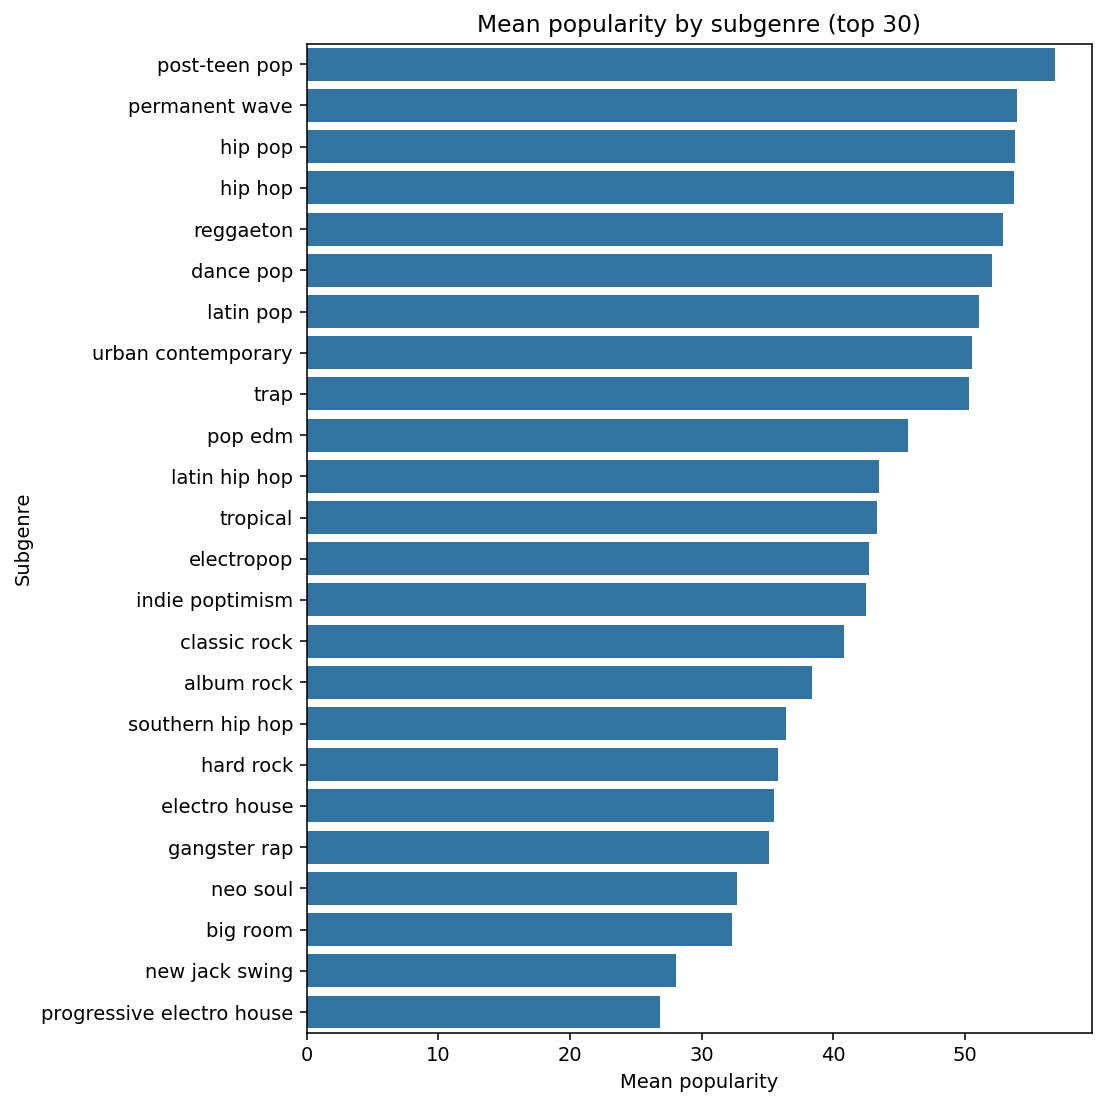

In [328]:
ag_sg = (df.groupby("playlist_subgenre")["track_popularity"]
               .mean().sort_values(ascending=False).head(30))
plt.figure(figsize=(8,8))
sns.barplot(x=ag_sg.values, y=ag_sg.index, orient="h")
plt.title("Mean popularity by subgenre (top 30)")
plt.xlabel("Mean popularity"); plt.ylabel("Subgenre")
plt.tight_layout(); plt.show()

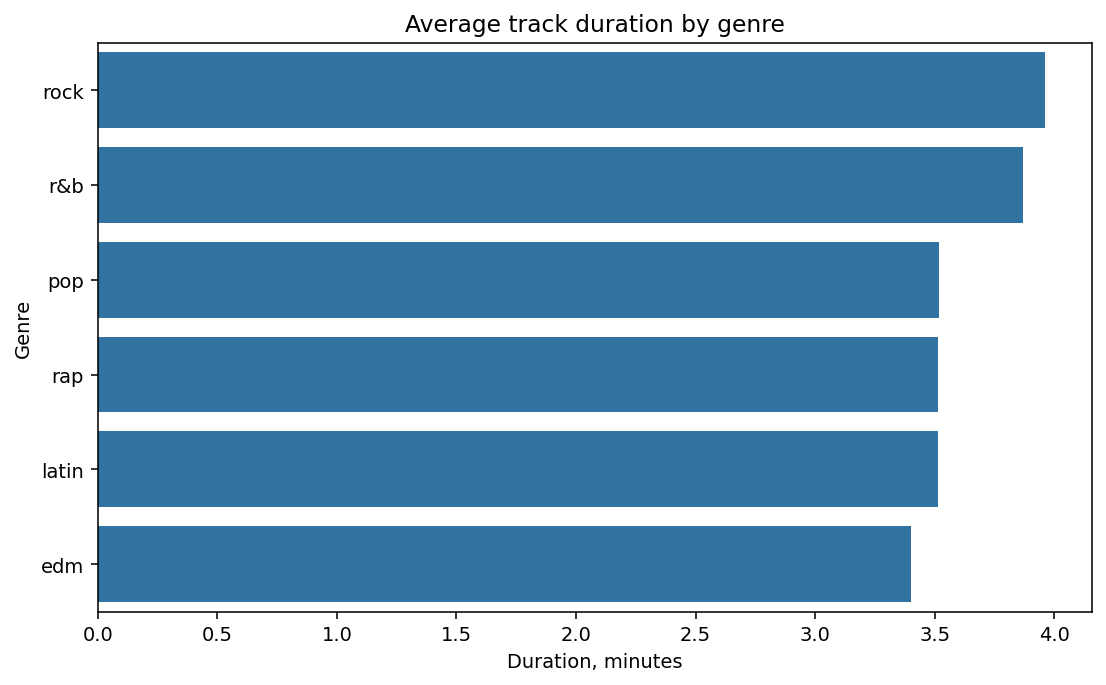

In [329]:
ag_dur = (df.groupby("playlist_genre")["duration_min"]
                .median().sort_values(ascending=False))
plt.figure(figsize=(8,5))
sns.barplot(x=ag_dur.values, y=ag_dur.index, orient="h")
plt.title("Average track duration by genre")
plt.xlabel("Duration, minutes"); plt.ylabel("Genre")
plt.tight_layout(); plt.show()

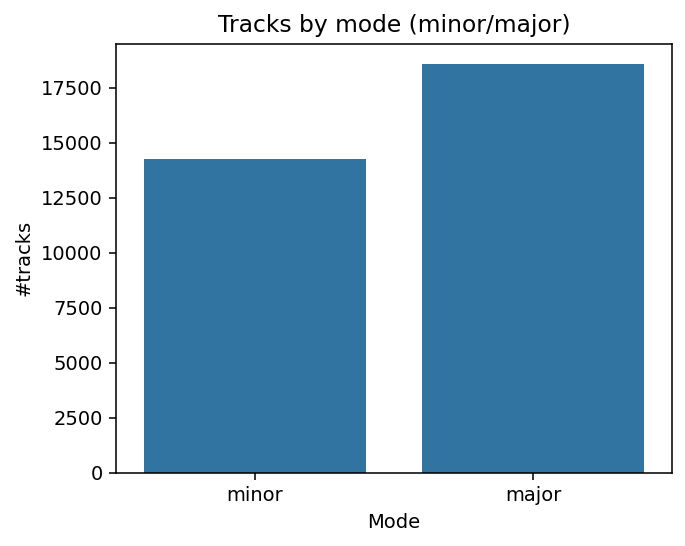

In [330]:
cnt = df["mode_label"].value_counts().reindex(["minor","major"]).fillna(0)
plt.figure(figsize=(5,4))
sns.barplot(x=cnt.index, y=cnt.values)
plt.title("Tracks by mode (minor/major)")
plt.xlabel("Mode"); plt.ylabel("#tracks")
plt.tight_layout(); plt.show()

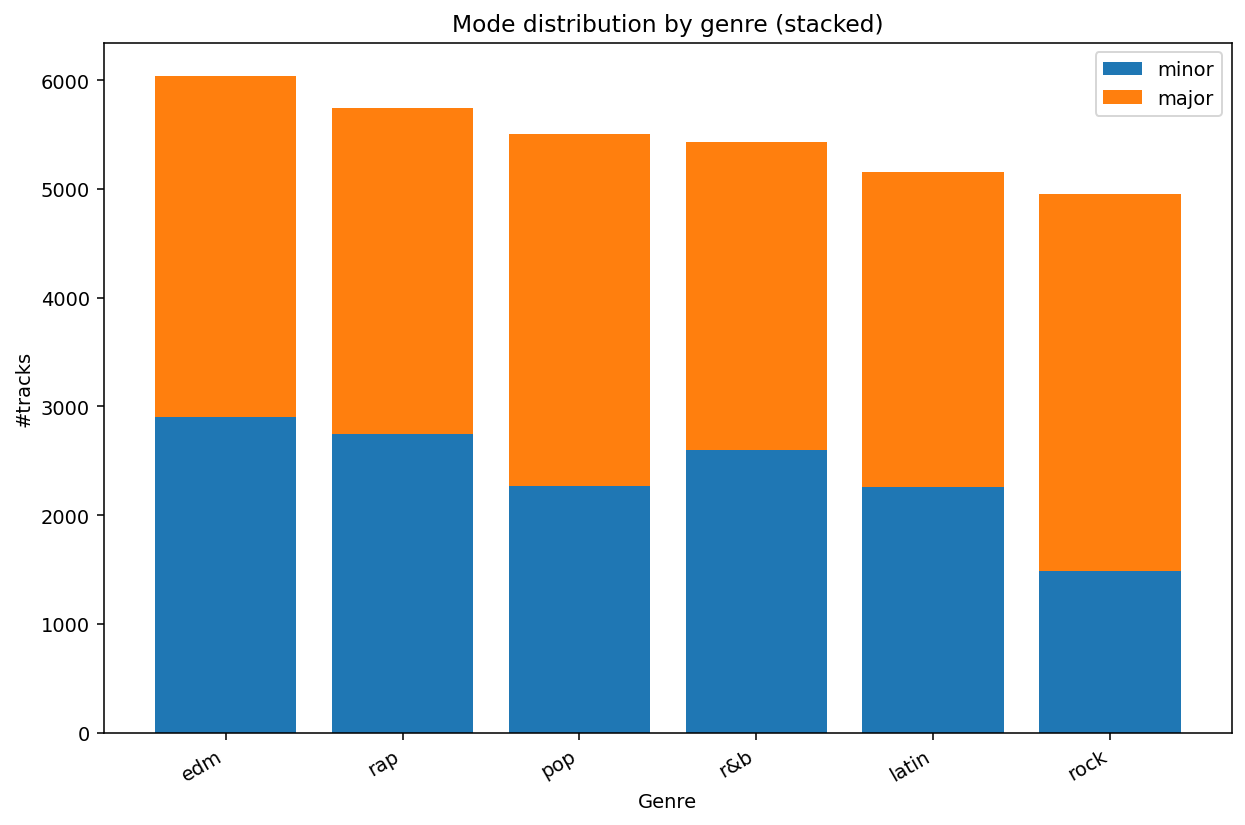

In [331]:
tab = pd.crosstab(df["playlist_genre"], df["mode_label"])\
               .reindex(columns=["minor","major"]).fillna(0)
tab = tab.loc[tab.sum(axis=1).sort_values(ascending=False).index]
fig, ax = plt.subplots(figsize=(9,6))
bottom = np.zeros(len(tab))
for col in tab.columns:
    ax.bar(tab.index, tab[col].values, bottom=bottom, label=col)
    bottom += tab[col].values
ax.set_title("Mode distribution by genre (stacked)")
ax.set_xlabel("Genre"); ax.set_ylabel("#tracks")
ax.legend(); plt.xticks(rotation=30, ha="right")
plt.tight_layout(); plt.show()

C:\Users\ДС\AppData\Local\Temp\ipykernel_12752\2374192030.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_era = (tmp.groupby("era")["duration_min"]


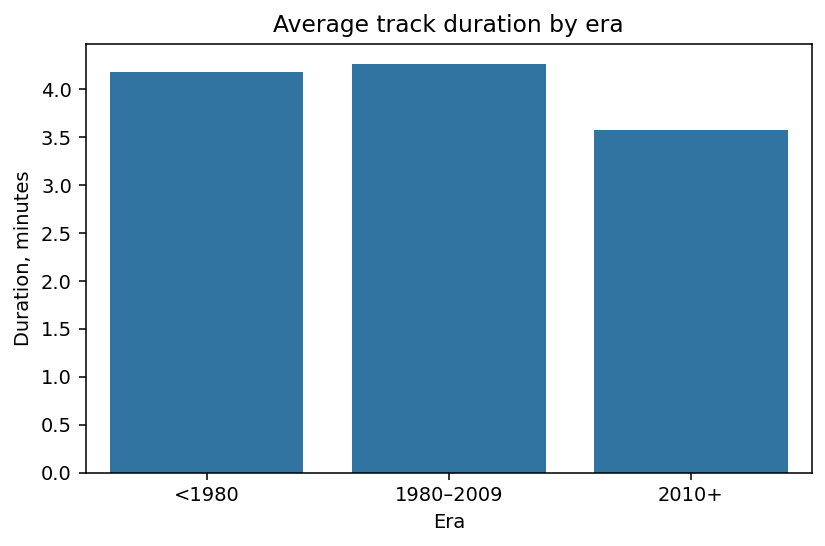

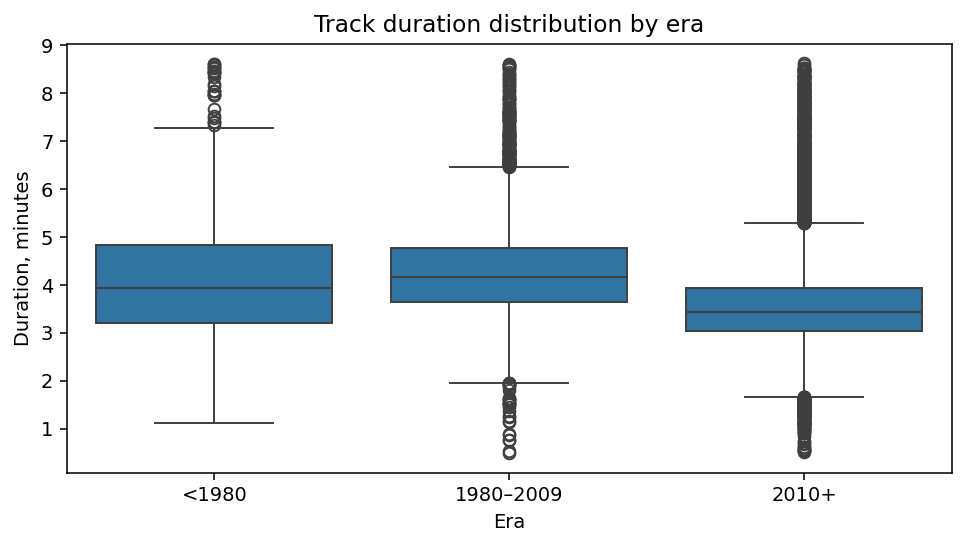

In [332]:
tmp = df.dropna(subset=["release_year", "duration_min"]).copy()
tmp["era"] = pd.cut(
    tmp["release_year"],
    bins=[-np.inf, 1979, 2009, np.inf],
    labels=["<1980", "1980–2009", "2010+"]
)

dur_era = (tmp.groupby("era")["duration_min"]
             .mean()
             .reindex(["<1980", "1980–2009", "2010+"]))

plt.figure(figsize=(6,4))
sns.barplot(x=dur_era.index, y=dur_era.values)
plt.title("Average track duration by era")
plt.xlabel("Era"); plt.ylabel("Duration, minutes")
plt.tight_layout(); plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=tmp, x="era", y="duration_min",
            order=["<1980", "1980–2009", "2010+"])
plt.title("Track duration distribution by era")
plt.xlabel("Era"); plt.ylabel("Duration, minutes")
plt.tight_layout(); plt.show()


C:\Users\ДС\AppData\Local\Temp\ipykernel_12752\3709486504.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index="playlist_genre", columns="valence_bin",


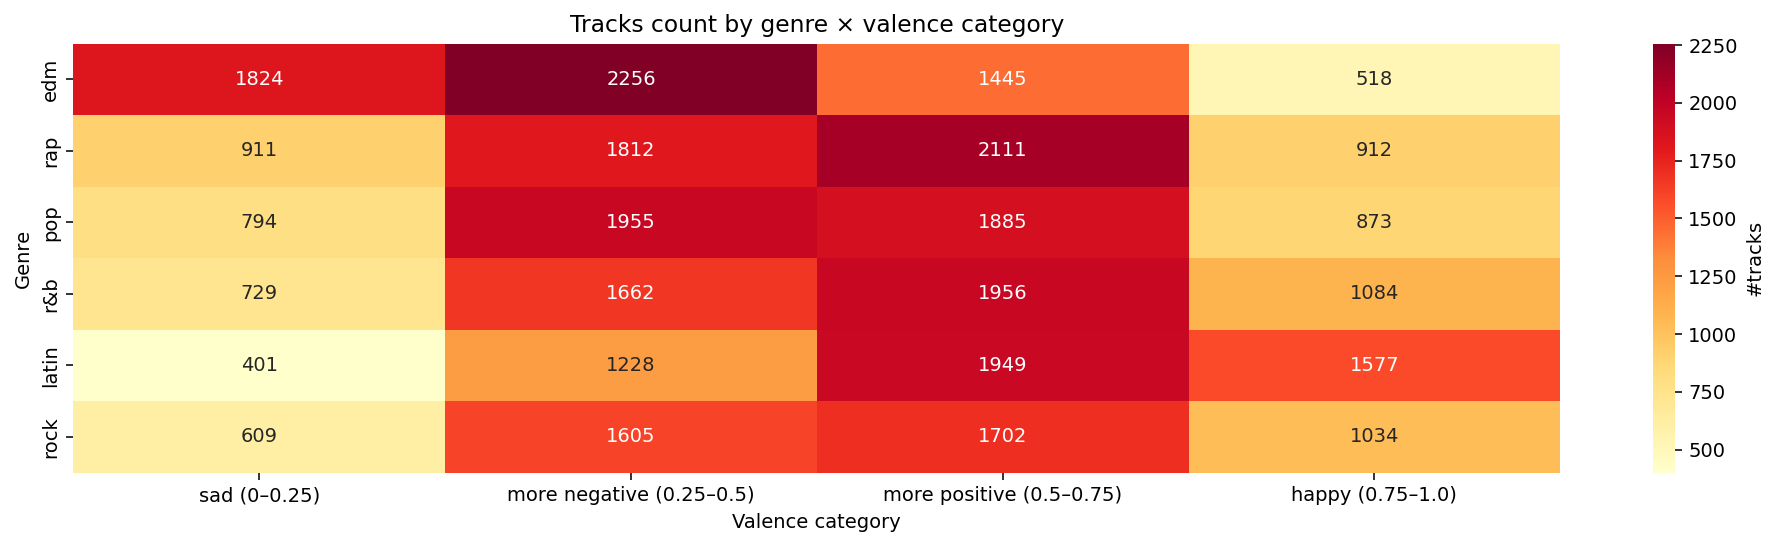

In [333]:
bins = [0.0, 0.25, 0.5, 0.75, 1.0]
labels = ["sad (0–0.25)", "more negative (0.25–0.5)",
            "more positive (0.5–0.75)", "happy (0.75–1.0)"]
tmp = df.copy()
tmp = tmp[(tmp["valence"] >= 0) & (tmp["valence"] <= 1)]
tmp["valence_bin"] = pd.cut(tmp["valence"], bins=bins, labels=labels, include_lowest=True, right=False)

pivot = (tmp.assign(cnt=1)
            .pivot_table(index="playlist_genre", columns="valence_bin",
                            values="cnt", aggfunc="sum", fill_value=0))

pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(14, 4))
ax = sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd",
                    cbar_kws={"label": "#tracks"})
ax.set_title("Tracks count by genre × valence category")
ax.set_xlabel("Valence category", fontsize = 10); ax.set_ylabel("Genre", fontsize = 10)
plt.tight_layout()
plt.show()

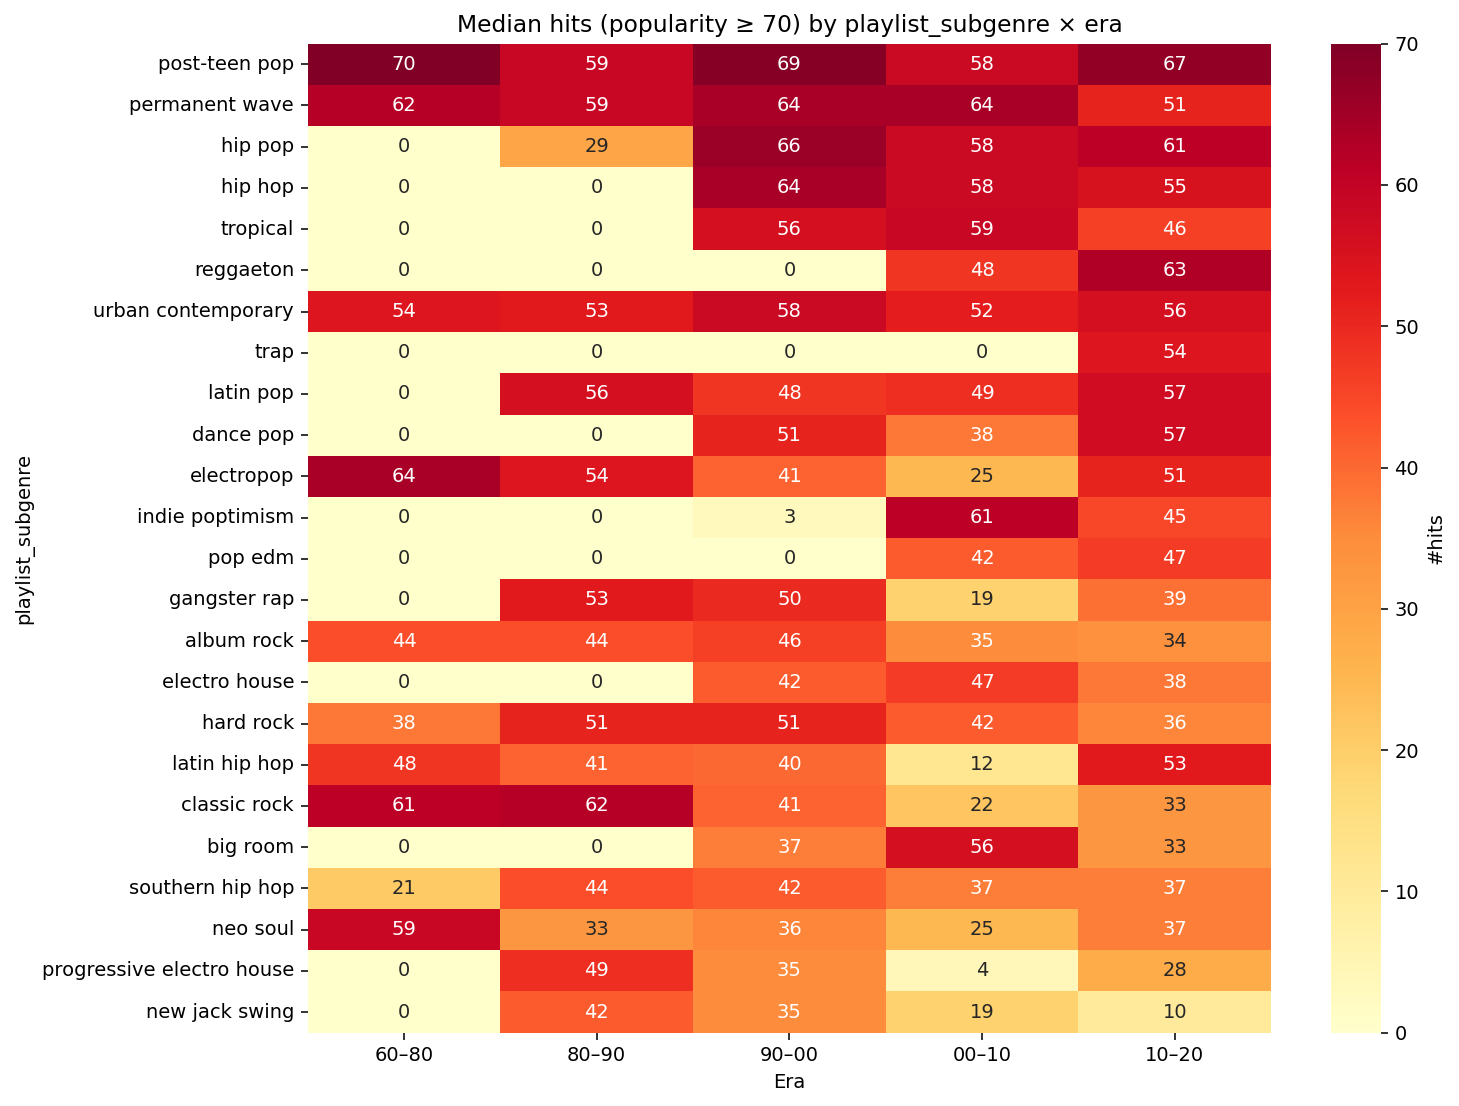

In [334]:
HIT_THR = 70
bins   = [1960, 1980, 1990, 2000, 2010, 2020]
labels = ['60–80','80–90','90–00','00–10','10–20']

col_g = 'playlist_subgenre'
cols = ['release_year', col_g, 'track_popularity']

d = (df.loc[df['release_year'].between(bins[0], bins[-1]-1), cols]
       .dropna(subset=cols)
       .assign(
           era   = lambda x: pd.cut(x['release_year'], bins=bins, right=False,
                                    labels=labels, ordered=True),
           is_hit= lambda x: x['track_popularity'] >= HIT_THR)
     )

g = (d.groupby([col_g,'era'], observed=True)['track_popularity']
       .median()
       .reset_index(name='hits'))

TOP_N = 30
top = (g.groupby(col_g)['hits'].median().sort_values(ascending=False).head(TOP_N).index)
g = g[g[col_g].isin(top)]
g[col_g] = pd.Categorical(g[col_g], categories=top, ordered=True)

mat = (g.pivot(index=col_g, columns='era', values='hits').fillna(0).astype(int))

plt.figure(figsize=(11, 8))
sns.heatmap(mat, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': '#hits'})
plt.title(f'Median hits (popularity ≥ {HIT_THR}) by {col_g} × era')
plt.xlabel('Era'); plt.ylabel(col_g)
plt.tight_layout(); plt.show()


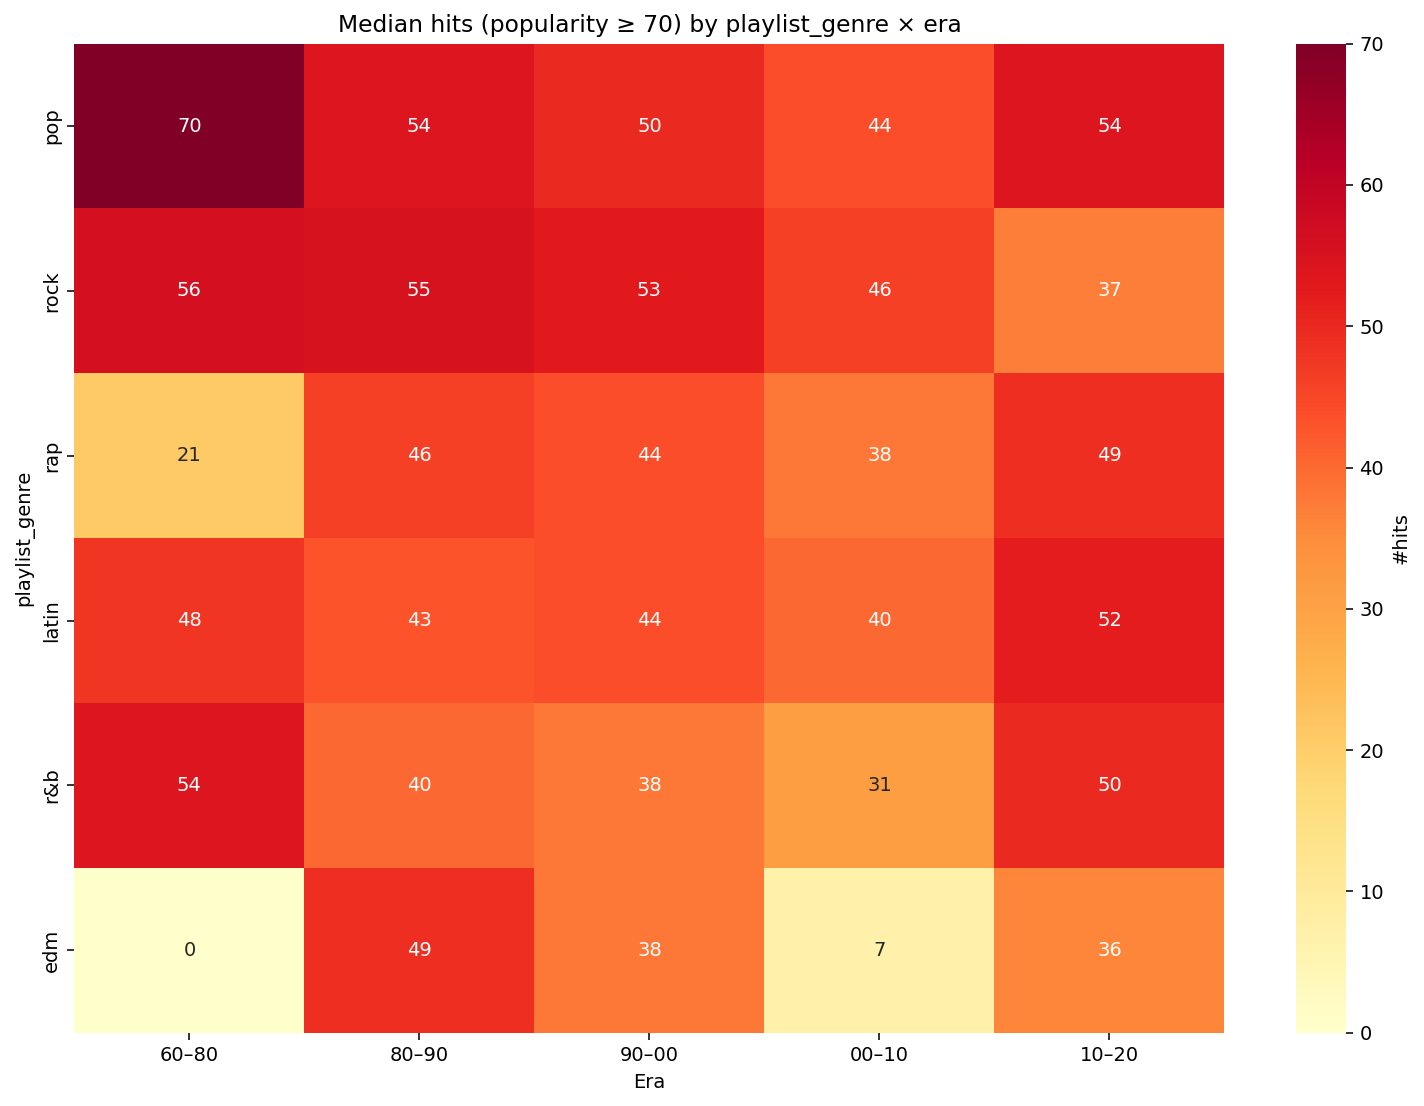

In [335]:
HIT_THR = 70
bins   = [1960, 1980, 1990, 2000, 2010, 2020]
labels = ['60–80','80–90','90–00','00–10','10–20']

col_g = 'playlist_genre'
cols = ['release_year', col_g, 'track_popularity']

d = (df.loc[df['release_year'].between(bins[0], bins[-1]-1), cols]
       .dropna(subset=cols)
       .assign(
           era   = lambda x: pd.cut(x['release_year'], bins=bins, right=False,
                                    labels=labels, ordered=True),
           is_hit= lambda x: x['track_popularity'] >= HIT_THR)
     )

g = (d.groupby([col_g,'era'], observed=True)['track_popularity']
       .median()
       .reset_index(name='hits'))

TOP_N = 30
top = (g.groupby(col_g)['hits'].median().sort_values(ascending=False).head(TOP_N).index)
g = g[g[col_g].isin(top)]
g[col_g] = pd.Categorical(g[col_g], categories=top, ordered=True)

mat = (g.pivot(index=col_g, columns='era', values='hits').fillna(0).astype(int))

plt.figure(figsize=(11, 8))
sns.heatmap(mat, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': '#hits'})
plt.title(f'Median hits (popularity ≥ {HIT_THR}) by {col_g} × era')
plt.xlabel('Era'); plt.ylabel(col_g)
plt.tight_layout(); plt.show()


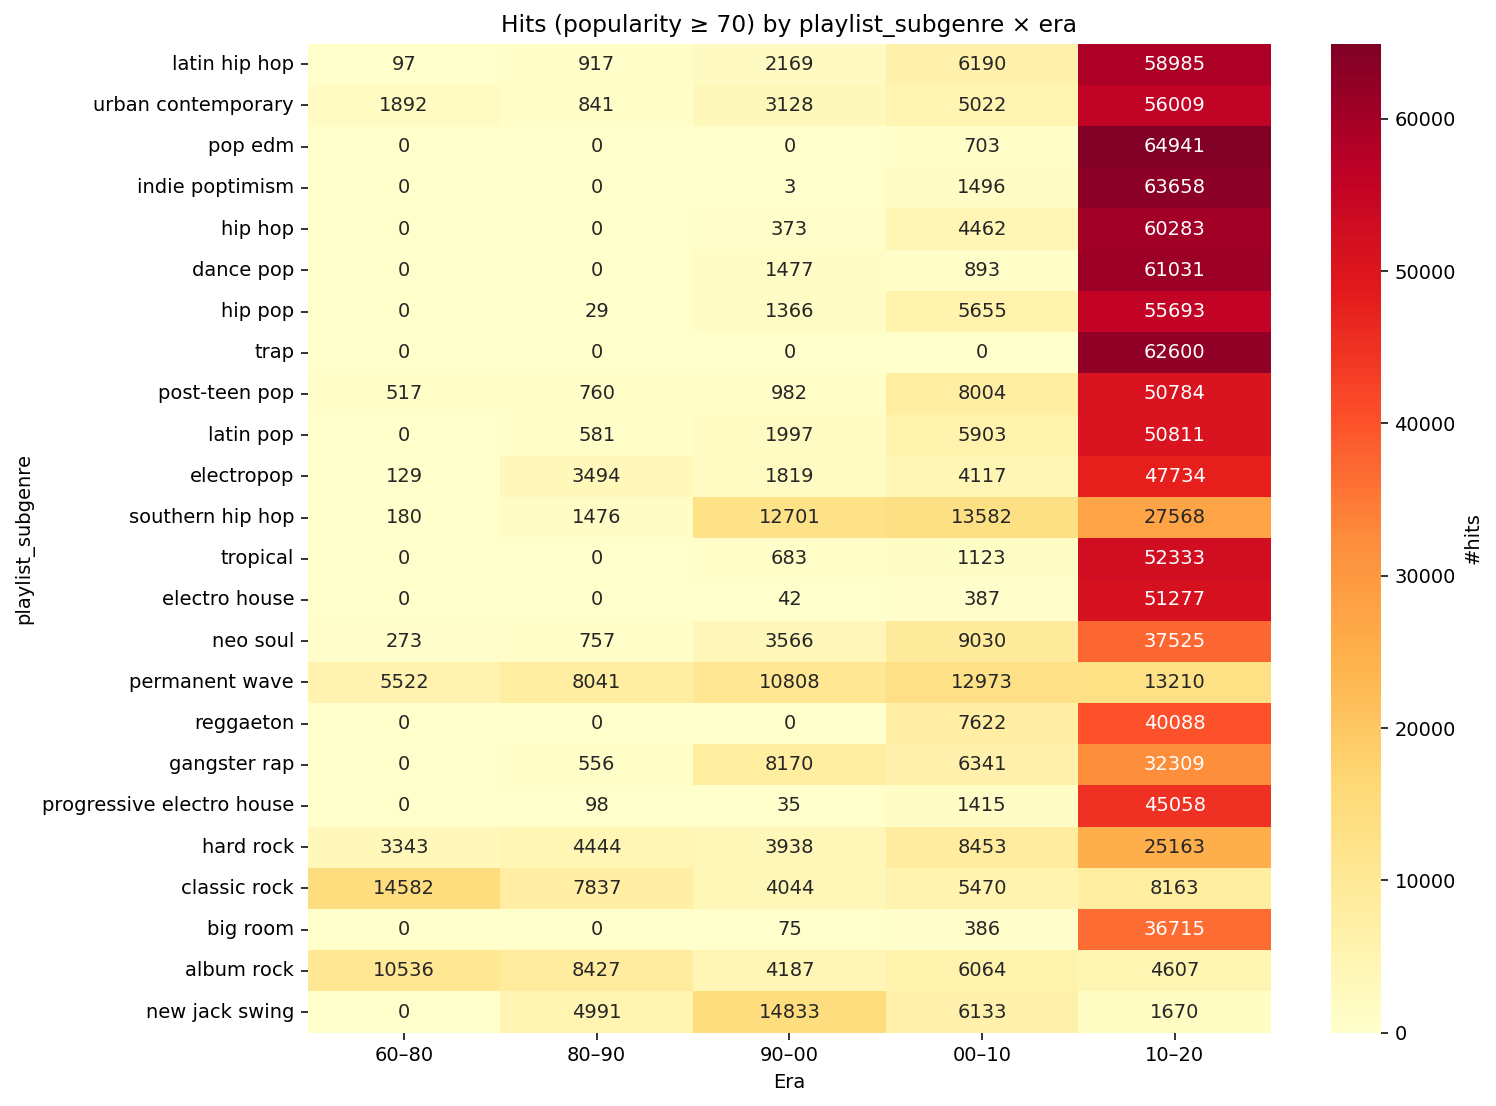

In [336]:
HIT_THR = 70
bins = [1960, 1980, 1990, 2000, 2010, 2020]
labels = ['60–80','80–90','90–00','00–10','10–20']

col_g = 'playlist_subgenre'
cols = ['release_year', col_g, 'track_popularity']

d = (df.loc[df['release_year'].between(bins[0], bins[-1]-1), cols]
       .dropna(subset=cols)
       .assign(
           era   = lambda x: pd.cut(x['release_year'], bins=bins, right=False,
                                    labels=labels, ordered=True),
           is_hit= lambda x: x['track_popularity'] >= HIT_THR)
     )

g = (d.groupby([col_g,'era'], observed=True)['track_popularity']
     .sum()
     .reset_index(name='hits'))

TOP_N = 30
top = (g.groupby(col_g)['hits'].sum().sort_values(ascending=False).head(TOP_N).index)
g = g[g[col_g].isin(top)]
g[col_g] = pd.Categorical(g[col_g], categories=top, ordered=True)

mat = (g.pivot(index=col_g, columns='era', values='hits').fillna(0).astype(int))

plt.figure(figsize=(11, 8))
sns.heatmap(mat, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': '#hits'})
plt.title(f'Hits (popularity ≥ {HIT_THR}) by {col_g} × era')
plt.xlabel('Era'); plt.ylabel(col_g)
plt.tight_layout(); plt.show()


Гипотеза 1: на графиках видно, что число треков резко возрастает начиная с 2000х, при этом медианная популярность не растет так же быстро; предположение: если нормировать отбор рекомендаций по эпохам внутри жанра (например, ограничить долю новых треков и добавить равновесно из старых каталогов в том же поджанре), то общая вовлеченность не просядет, а доля сохранений и разнообразие треков вырастут.
Метрики: доля прослушиваний >30 с падающим early-skip/средняя длительность прослушивания в сессии/add-to-playlist rate/доля уникальных поджанров в первых N треках.

Гипотеза 2: после 2010 средняя продолжительность трека стала меньше, длинные треки (больше 4 минут) чаще скипаются в первых позициях ленты рекомендацийю; если ограничить долю длинных треков в верхних позициях рекомендованных треков или понизить их вес, рання удержанность вырастет без падения сохранений.
Метрики: early-skip rate/среднее прослушанное время в первых N треках/downstream-вовлеченность (вторая песня в сессии).

Планирование эксперимента, тесты (тут достаточно часто использовал нейронки):

In [350]:
from scipy import stats

# ---------- 0) Подготовка источника (robust к разным именам столбцов)
colmap = {
    'playlist_genre':'genre',
    'playlist_subgenre':'subgenre',
    'track_duration_ms':'duration_ms',
    'track_album_release_date':'release_date'
}
df = df.rename(columns={k:v for k,v in colmap.items() if k in df.columns})

need = ['track_id','track_popularity','duration_ms','genre','subgenre','release_year']
df = df[[c for c in need if c in df.columns]].dropna()
df = df[(df['release_year']>=1956) & (df['release_year']<=2020)]
df = df[df['duration_ms']>0].copy()
df['pop_norm'] = (df['track_popularity']-df['track_popularity'].min()) / \
                 (df['track_popularity'].max()-df['track_popularity'].min())

# ---------- 1) Параметры симуляции
rng = np.random.default_rng(42)
N_USERS     = 20_000
SLOTS       = 10
OLD_CUTOFF  = 2000
LONG_THR    = 240_000
DELTA_CTR   = 0.06        # uplift клика для B в топ-5 (G1)
DEMOTE_LONG = 0.70        # в B в топ-5 70% показов берём из «коротких» (G2)

# ---------- 2) Генерация эксперимента (экспозиции)
users = pd.DataFrame({'user_id': np.arange(1, N_USERS+1, dtype=np.int32)})
users['group'] = np.where(rng.random(N_USERS) < 0.5, 'A', 'B')

expo = (users.loc[users.index.repeat(SLOTS)]
              .assign(position=np.tile(np.arange(1, SLOTS+1), len(users)).astype('int8'))
              .reset_index(drop=True))

pool = df[['track_id','track_popularity','pop_norm','duration_ms','genre','subgenre','release_year']] \
         .reset_index(drop=True)
idx_all   = np.arange(len(pool))
idx_short = pool.index[pool['duration_ms']<=LONG_THR].to_numpy()

mask_B_top5 = (expo['group'].eq('B') & (expo['position']<=5)).to_numpy()
idx = np.empty(len(expo), dtype=np.int32)
nB = mask_B_top5.sum()
choose_short = rng.random(nB) < DEMOTE_LONG      # True → берём короткий
idx_B = np.where(choose_short,
                 rng.choice(idx_short, size=nB, replace=True),
                 rng.choice(idx_all,   size=nB, replace=True))
idx[mask_B_top5]  = idx_B
idx[~mask_B_top5] = rng.choice(idx_all, size=(~mask_B_top5).sum(), replace=True)

expo = pd.concat([expo, pool.loc[idx].reset_index(drop=True)], axis=1)
expo['is_old'] = (expo['release_year'] < OLD_CUTOFF).astype('int8')
expo['is_long']= (expo['duration_ms'] > LONG_THR).astype('int8')

# ---------- 3) Модель поведения
base_listen = 0.55 * np.exp(-0.15*(expo['position']-1))
atten_len   = np.clip(1.25 - (expo['duration_ms']/LONG_THR).clip(0,2)*0.5, 0.2, 1.2)
p_listen    = np.clip(base_listen * atten_len, 0.02, 0.98)

# «переносим» длинные из топ-5 в B → ожидаем меньше ранних скипов
# (дополнительно немного увеличим p_listen для длинных в B, слоты 1–5)
boost_mask = (expo['group'].eq('B') & (expo['position']<=5) & (expo['is_long']==1))
p_listen = np.where(boost_mask, np.clip(p_listen*1.10, 0.02, 0.99), p_listen)

frac_listened = rng.beta(a=2*p_listen, b=2*(1-p_listen))
expo['listened_ms'] = (frac_listened * expo['duration_ms']).astype('int32')
expo['early_skip']  = (expo['listened_ms'] < 30_000).astype('int8')

# CTR: функция от популярности и позиции + uplift в B для топ-5 (G1)
p_click_base = np.clip(0.03 + 0.42*expo['pop_norm'] - 0.03*(expo['position']-1), 0.01, 0.8)
p_click      = np.where(expo['group'].eq('B') & (expo['position']<=5),
                        np.clip(p_click_base*(1+DELTA_CTR), 0.01, 0.95),
                        p_click_base)
expo['clicked'] = (rng.random(len(expo)) < p_click).astype('int8')

# «сохранение» — побочная метрика
p_save = np.clip(0.05 + 0.25*expo['pop_norm'] + 0.10*expo['clicked'], 0.01, 0.8)
expo['saved'] = (rng.random(len(expo)) < p_save).astype('int8')

logs = expo.copy()

# ---------- 4) Агрегации для G1 (только слоты 1–5)
def agg_top5(df, N_top=5):
    top = df[df['position']<=N_top]
    return (top.groupby('user_id', as_index=False)
              .agg(ctr      = ('clicked','mean'),
                   early_skip=('early_skip','mean'),
                   listen_sec=('listened_ms', lambda x: x.mean()/1000.0),
                   save_rate = ('saved','mean'),
                   year_div  = ('release_year','nunique'))
              .merge(df[['user_id','group']].drop_duplicates(), on='user_id'))

user_top5 = agg_top5(logs, N_top=5)

# ---------- 5) Агрегации для G2 (доля длинных в топ-5 и ранние скипы)
top5 = logs[logs['position'].between(1,5)]
user_h11 = (top5.groupby('user_id', as_index=False)
                 .agg(early_skip=('early_skip','mean'),
                      long_share = ('is_long','mean'))
                 .merge(logs[['user_id','group']].drop_duplicates(), on='user_id'))

# ---------- 6) Вспомогательные тесты
def rel_lift(b, a): 
    return (b.mean() - a.mean())/max(1e-9, a.mean())

def bootstrap_ci(a, b, metric, B=4000, alpha=0.05, seed=7):
    r = np.random.default_rng(seed)
    a_vals, b_vals = a[metric].to_numpy(), b[metric].to_numpy()
    nA, nB = len(a_vals), len(b_vals)
    boots = []
    for _ in range(B):
        da = r.choice(a_vals, nA, replace=True).mean()
        db = r.choice(b_vals, nB, replace=True).mean()
        boots.append((db-da)/max(1e-9, da))
    lo, hi = np.quantile(boots, [alpha/2, 1-alpha/2])
    return float(lo), float(hi)

def compare(df, metric, label, higher_is_better=True):
    A = df[df.group=='A']; B = df[df.group=='B']
    alt = 'greater' if higher_is_better else 'less'
    t = stats.ttest_ind(B[metric], A[metric], equal_var=False, alternative=alt)
    u = stats.mannwhitneyu(B[metric], A[metric], alternative=alt)
    lift = (B[metric].mean() - A[metric].mean()) / max(1e-9, A[metric].mean())
    lo, hi = bootstrap_ci(A,B,metric)
    print(f'{label:32s}  A={A[metric].mean():.4f}  B={B[metric].mean():.4f}  '
          f'lift={100*lift:6.2f}%   t_p={t.pvalue:8.4g}  MW_p={u.pvalue:8.4g}  CI[{100*lo:5.2f}; {100*hi:5.2f}]')

# G1 (в топ-5): CTR/Save/ListenSec/YearDiv — higher_is_better=True; early_skip — False
compare(user_top5, 'ctr',        'G1: CTR top-5',                True)
compare(user_top5, 'early_skip', 'G1: early-skip (lower better)',False)
compare(user_top5, 'listen_sec', 'G1: mean listened sec',        True)
compare(user_top5, 'save_rate',  'G1: save rate',                True)
compare(user_top5, 'year_div',   'G1: diversity (years)',        True)

# G2 — влияние демоута длинных треков в топ-5
compare(user_h11,  'early_skip', 'G2: early-skip top-5',         False)
compare(user_h11,  'long_share', 'G2: long tracks share',        False)

G1: CTR top-5                     A=0.1548  B=0.1696  lift=  9.54%   t_p=9.495e-11  MW_p=6.226e-10  CI[ 6.62; 12.58]
G1: early-skip (lower better)     A=0.3482  B=0.3430  lift= -1.49%   t_p= 0.03674  MW_p= 0.02973  CI[-3.12;  0.14]
G1: mean listened sec             A=70.1734  B=68.5402  lift= -2.33%   t_p=       1  MW_p=  0.9999  CI[-3.34; -1.31]
G1: save rate                     A=0.1724  B=0.1775  lift=  3.00%   t_p= 0.01595  MW_p=0.009694  CI[ 0.16;  5.92]
G1: diversity (years)             A=4.0381  B=3.8214  lift= -5.37%   t_p=       1  MW_p=       1  CI[-5.96; -4.79]
G2: early-skip top-5              A=0.3482  B=0.3430  lift= -1.49%   t_p= 0.03674  MW_p= 0.02973  CI[-3.12;  0.14]
G2: long tracks share             A=0.3096  B=0.0937  lift=-69.74%   t_p=       0  MW_p=       0  CI[-70.64; -68.80]


CTR +9.5%; Early-skip -1.5%, Прослушанные секунды -2.3%(ожидаемо из-за более коротких треков); save-rate +3%, разнообразие лет -5.4%; доля длинны треков -70%